In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

In [65]:
M = 10
Ns = [0, 1, 3, 9]

In [66]:
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i) / float(num - 1)
        y = np.sin(2 * np.pi * x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index = ['x', 'y']), ignore_index=True)
    return dataset

In [67]:
train_set = create_dataset(M)
test_set = create_dataset(M)
df_ws = DataFrame()
print(train_set)

          x         y
0  0.000000  0.077777
1  0.111111  0.152123
2  0.222222  0.903474
3  0.333333  0.834989
4  0.444444  0.178869
5  0.555556 -0.309433
6  0.666667 -0.801591
7  0.777778 -1.166763
8  0.888889 -0.586152
9  1.000000  0.087361


In [74]:
def resolve(dataset, n):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, n + 1):
        p = dataset.x ** i
        p.name = "x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)
    
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y
    return (f, ws)

In [75]:
def rms_error(dataset, f):
    err = 0.0 aaa
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

SyntaxError: invalid syntax (<ipython-input-75-e0360ec3d823>, line 2)

Table of the coefficients
        N=0       N=0       N=0       N=1        N=3           N=9
0 -0.062935 -0.062935 -0.062935  0.505181  -0.142374      0.077595
1       NaN       NaN       NaN -1.136231   9.882134      6.481843
2       NaN       NaN       NaN       NaN -29.445258   -263.246094
3       NaN       NaN       NaN       NaN  19.795469   3426.783570
4       NaN       NaN       NaN       NaN        NaN -18735.561419
5       NaN       NaN       NaN       NaN        NaN  53584.348086
6       NaN       NaN       NaN       NaN        NaN -87457.246906
7       NaN       NaN       NaN       NaN        NaN  82100.979171
8       NaN       NaN       NaN       NaN        NaN -41258.754959
9       NaN       NaN       NaN       NaN        NaN   8596.226210


/Users/mono/.pyenv/versions/3.5.0/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


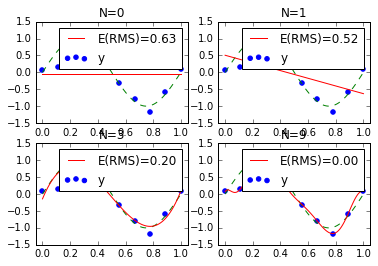

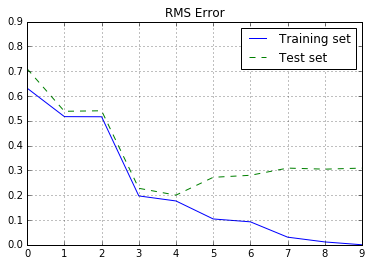

In [76]:
fig = plt.figure()

for c, n in enumerate(Ns):
    f, ws = resolve(train_set, n)
    df_ws = df_ws.append(Series(ws,name="N=%d" % n))

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("N=%d" % n)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)

# 係数の値を表示
print("Table of the coefficients")
print(df_ws.transpose())
fig.show()

# トレーニングセットとテストセットでの誤差の変化を表示
df = DataFrame(columns=['Training set','Test set'])
for m in range(0,10):   # 多項式の次数
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
plt.show()